<a href="https://colab.research.google.com/github/Foysal-Munsy/cvpr/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=10000,
    n_features=5,
    n_informative=5,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=5,
    random_state=42
)

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2)

In [10]:
X.shape

(10000, 5)

In [11]:
y_onehot.shape

(10000, 5)

In [12]:
class NeuralNetwork:
    def __init__(self):
        # here is change in numbers of hidden layer and weights as per the assigment requirement
        inputLayerNeurons = 5
        hiddenLayerNeurons1 = 10
        hiddenLayerNeurons2 = 10
        hiddenLayerNeurons3 = 10
        outputLayerNeurons = 5

        self.learningRate = 0.00001
        self.W_HI = np.random.rand(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_HH1 = np.random.rand(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_HH2 = np.random.rand(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_HO = np.random.rand(hiddenLayerNeurons3, outputLayerNeurons)

    # Activation functions
    '''relu is more efficient than sigmoid thats why used it'''
    def ReLU(self, x, der=False):
        if der:
            return np.where(x > 0, 1, 0)
        else:
            return np.maximum(0, x)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.ReLU(self.hidden_input1)

        self.hidden_input2 = np.dot(self.hidden_output1, self.W_HH1)
        self.hidden_output2 = self.ReLU(self.hidden_input2)

        self.hidden_input3 = np.dot(self.hidden_output2, self.W_HH2)
        self.hidden_output3 = self.ReLU(self.hidden_input3)

        self.output_input = np.dot(self.hidden_output3, self.W_HO)
        ''' As The SoftMax activation function normalizes
        the input values into a probability distribution,
        ensuring that the sum of all output values is 1.
        Thats why used in the output layer'''
        pred = self.softmax(self.output_input)
        return pred


    def backward(self, X, Y, pred):
        output_error = Y - pred
        '''The gradient of the loss with respect to the network output,
        when using softmax and cross-entropy, simplifies to the difference
        between the predicted softmax output and the true labels. '''
        output_delta = output_error

        hidden_error3 = output_delta.dot(self.W_HO.T)
        hidden_delta3 = hidden_error3 * self.ReLU(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_HH2.T)
        hidden_delta2 = hidden_error2 * self.ReLU(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_HH1.T)
        hidden_delta1 = hidden_error1 * self.ReLU(self.hidden_output1, der=True)

        self.W_HI += X.T.dot(hidden_delta1) * self.learningRate
        self.W_HH1 += self.hidden_output1.T.dot(hidden_delta2) * self.learningRate
        self.W_HH2 += self.hidden_output2.T.dot(hidden_delta3) * self.learningRate
        self.W_HO += self.hidden_output3.T.dot(output_delta) * self.learningRate

    def train(self, X, Y):
        output = self.forward(X)
        self.backward(X, Y, output)
        return output


In [13]:
NN = NeuralNetwork()
# Lists to store training and validation errors
train_errors = []
val_errors = []

# Initialize variables to store final outputs
final_train_outputs = None
final_val_outputs = None

for i in range(10000):
    # Train the network on the training data
    NN.train(X_train, y_train)
    output_train = NN.forward(X_train)

    # Calculate and store training error
    train_error = np.mean(np.square(y_train - output_train))
    train_errors.append(train_error)

    # Forward pass on the validation set
    output_val = NN.forward(X_val)

    # Calculate and store validation error
    val_error = np.mean(np.square(y_val - output_val))
    val_errors.append(val_error)

    # Store final outputs
    final_train_outputs = output_train
    final_val_outputs = output_val


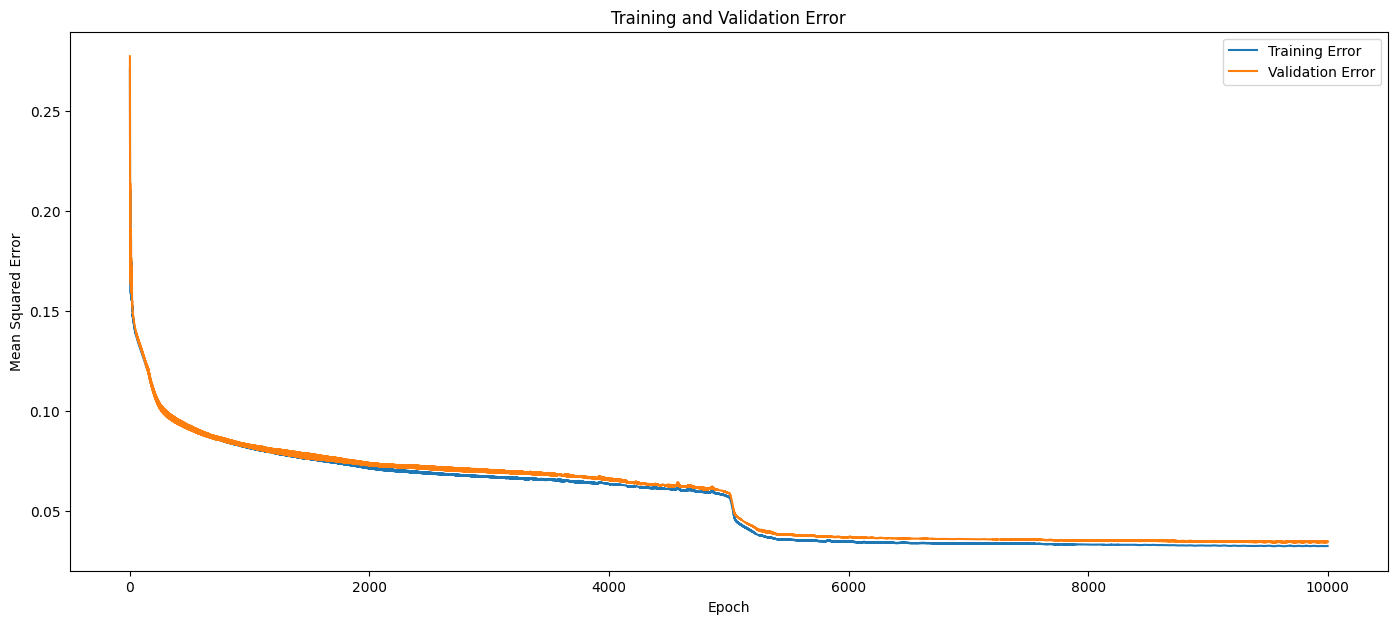

In [14]:
# Plotting training and validation error
plt.figure(figsize=(17,7))
plt.plot(train_errors, label='Training Error')
plt.plot(val_errors, label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

In [15]:
# Convert outputs to class labels
def convert_to_labels(output):
    return np.argmax(output, axis=1)

# Convert true labels to class labels
y_train_true = convert_to_labels(y_train)
y_val_true = convert_to_labels(y_val)

# Convert final outputs to class labels
y_train_pred = convert_to_labels(final_train_outputs)
y_val_pred = convert_to_labels(final_val_outputs)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train_true, y_train_pred)
val_accuracy = accuracy_score(y_val_true, y_val_pred)

train_precision = precision_score(y_train_true, y_train_pred, average='macro', zero_division=0)
val_precision = precision_score(y_val_true, y_val_pred, average='macro')

train_recall = recall_score(y_train_true, y_train_pred, average='macro')
val_recall = recall_score(y_val_true, y_val_pred, average='macro')

train_f1 = f1_score(y_train_true, y_train_pred, average='macro')
val_f1 = f1_score(y_val_true, y_val_pred, average='macro')

# Print or log the final metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Precision:", train_precision)
print("Validation Precision:", val_precision)
print("Training Recall:", train_recall)
print("Validation Recall:", val_recall)
print("Training F1 Score:", train_f1)
print("Validation F1 Score:", val_f1)


Training Accuracy: 0.88675
Validation Accuracy: 0.88
Training Precision: 0.8868473218038166
Validation Precision: 0.8824687209712219
Training Recall: 0.8867063967180935
Validation Recall: 0.8795545557988215
Training F1 Score: 0.886616761244834
Validation F1 Score: 0.8805073447025304
